# FEED FORWARD NEURAL NETWORK WITH KERAS

In this exercise, we will build a Feed Forward Neural Network (FFNN) using the deep learning library Keras integrated in TensorFlow. Use it to build your model in the following tasks.

a) Build a neural network with 5 layers and 10 neurons for each layer. Use a ReLU activation for all inner layers. Initialize all weights with uniformly distributed values and all biases with ones. Feed it some sample data and look at the results. Print a summary of your model with its layers and the number of trainable parameters. Explain how the number of trainable parameters is computed in this particular case.

b) To train our model, put together a synthetic training dataset. The examples have ten numerical features. Each feature of the examples is drawn randomly from a uniform distribution with a minimum value of -2 and a maximum value of 4. The dataset contains 15000 examples for training and 1000 for testing.

c) Label the training data according to the following rule: The label for each example is the third lowest feature value unless this value is smaller than 0.5. In this case, the label is the third lowest value divided by two.

d) Setup a training loop by:
- Preparing the created model to output data that fits the shape of the label data
- Using the Adam optimizer
- Using a suitable training loss (Why did you choose it?)
- Using a suitable training metric (Why did you choose it?)

e) Train your model with a batch size of 32 for 10 epochs and visualize the aggregated training statistics for each epoch in multiple plots, i.e., a plot of your training loss and one of your training metric.

f) Validate your trained model on the testing data. How can you determine if model training should be stopped early?


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# a) Build a neural network
model = keras.Sequential([
    layers.Dense(10, activation='relu', kernel_initializer='uniform', bias_initializer='ones', input_shape=(10,)),
    layers.Dense(10, activation='relu', kernel_initializer='uniform', bias_initializer='ones'),
    layers.Dense(10, activation='relu', kernel_initializer='uniform', bias_initializer='ones'),
    layers.Dense(10, activation='relu', kernel_initializer='uniform', bias_initializer='ones'),
    layers.Dense(10, activation='relu', kernel_initializer='uniform', bias_initializer='ones'),
    layers.Dense(1)  # Output layer for regression
])

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable 

Explanation of trainable parameters:

Each layer has weights and biases. For a layer with 'n' inputs and 'm' neurons:
- Weights: n * m (one weight for each input-neuron pair)
- Biases: m (one bias for each neuron)
Total parameters for a layer = n * m + m

In [2]:
# b) Create synthetic training dataset
np.random.seed(42)
X_train = np.random.uniform(-2, 4, (15000, 10))
X_test = np.random.uniform(-2, 4, (1000, 10))

In [3]:
# c) Create labels
def compute_labels(X):
    labels = []
    for example in X:
        third_lowest = np.partition(example, 2)[2]
        if third_lowest < 0.5:
            labels.append(third_lowest / 2)
        else:
            labels.append(third_lowest)
    return np.array(labels)

y_train = compute_labels(X_train)
y_test = compute_labels(X_test)

In [5]:
# d) Setup training loop
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

Explanation of loss and metric:

Mean Squared Error (MSE) is chosen because it penalizes larger errors more, which is useful for regression tasks.

Mean Absolute Error (MAE) is chosen as a metric for interpretability; it gives the average error in the same units as the output.

Epoch 1/10
469/469 [==============================] - 2s 2ms/step - loss: 0.1767 - mae: 0.3031 - val_loss: 0.1042 - val_mae: 0.2374
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1038 - mae: 0.2420 - val_loss: 0.1061 - val_mae: 0.2399
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1028 - mae: 0.2418 - val_loss: 0.1036 - val_mae: 0.2365
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1030 - mae: 0.2416 - val_loss: 0.1039 - val_mae: 0.2391
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1026 - mae: 0.2419 - val_loss: 0.1054 - val_mae: 0.2349
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1032 - mae: 0.2422 - val_loss: 0.1048 - val_mae: 0.2425
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1023 - mae: 0.2411 - val_loss: 0.1021 - val_mae: 0.2354
Epoch 8/10
469/469 [==============================] - 1s 1ms/step - loss: 0.

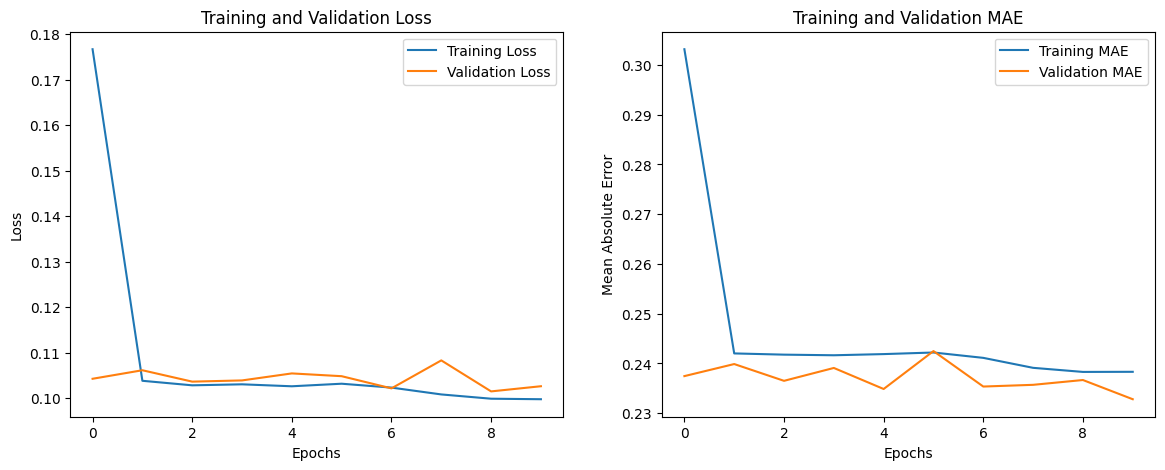

In [6]:
# e) Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Visualize training statistics
plt.figure(figsize=(14, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training metric (MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [7]:
# f) Validate the trained model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}')

32/32 [==============================] - 0s 1ms/step - loss: 0.1026 - mae: 0.2328
Test Loss: 0.1026, Test MAE: 0.2328


Early stopping criteria:

Early stopping can be determined by monitoring the validation loss.
If the validation loss does not improve for a set number of epochs (patience),
training can be stopped to prevent overfitting.